In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


4/1AfDhmrjYTr3RqIIYJi-xLan60WG_kwSkb3SRSrEv53VQx24A8UoYHjKZMZ0

In [ ]:
! pip install -q keras

In [ ]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [ ]:
import keras

In [ ]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
#print(os.listdir("../drive"))
print(os.listdir("/content/drive/My Drive/AutismDataset"))

['valid', 'consolidated', 'train', 'test']


In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
import numpy as np
from keras.applications import VGG16
from keras.models import Model
from keras import optimizers , layers, applications

###Train Dataset

In [ ]:
filenames = os.listdir("/content/drive/My Drive/AutismDataset/train")
categories = []
for filename in filenames:
    #print("opudj")
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
print(train_df)

                   filename category
0          Autistic.544.jpg        1
1      Non_Autistic.299.jpg        0
2      Non_Autistic.168.jpg        0
3      Non_Autistic.237.jpg        0
4     Non_Autistic.1084.jpg        0
...                     ...      ...
1740       Autistic.676.jpg        1
1741       Autistic.677.jpg        1
1742       Autistic.830.jpg        1
1743       Autistic.570.jpg        1
1744        Autistic.71.jpg        1

[1745 rows x 2 columns]


In [ ]:
train_df.head()

,filename,category
0,Autistic.544.jpg,1
1,Non_Autistic.299.jpg,0
2,Non_Autistic.168.jpg,0
3,Non_Autistic.237.jpg,0
4,Non_Autistic.1084.jpg,0


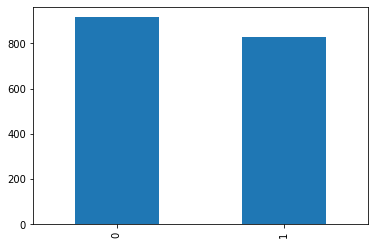

In [ ]:
train_df['category'].value_counts().plot.bar()

### Test dataset

In [ ]:
test_filenames = os.listdir("/content/drive/My Drive/AutismDataset/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
print(test_df)

                 filename
0         Autistic.76.jpg
1         Autistic.85.jpg
2        Autistic.104.jpg
3         Autistic.61.jpg
4         Autistic.29.jpg
..                    ...
295   Non_Autistic.20.jpg
296   Non_Autistic.93.jpg
297  Non_Autistic.112.jpg
298   Non_Autistic.66.jpg
299    Non_Autistic.1.jpg

[300 rows x 1 columns]


In [ ]:
test_df.head()

,filename
0,Autistic.76.jpg
1,Autistic.85.jpg
2,Autistic.104.jpg
3,Autistic.61.jpg
4,Autistic.29.jpg


In [ ]:
from PIL import Image
import random

### Sample Image

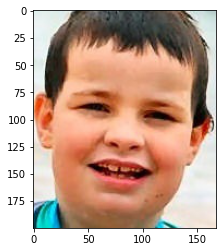

In [ ]:
sample = random.choice(filenames)
image = load_img("/content/drive/My Drive/AutismDataset/train/"+sample)
plt.imshow(image)

###Preparing Model

In [ ]:
image_size = 224
input_shape = (image_size, image_size, 3)

#Hyperparameters
epochs = 20
batch_size = 12
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)

In [ ]:
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

In [ ]:
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

In [ ]:
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

In [ ]:
#transfer learning
model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

###Prepare Test and Train Data


In [ ]:
train_df, validate_df = train_test_split(train_df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()


In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

###Training Generator & *Preprocessing*


In [ ]:

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)


Found 1570 validated image filenames belonging to 2 classes.


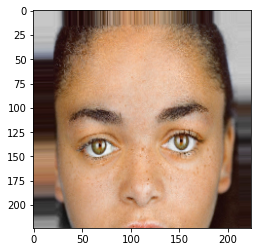

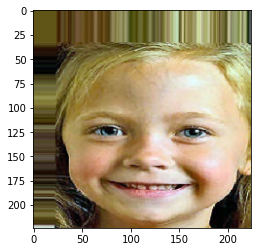

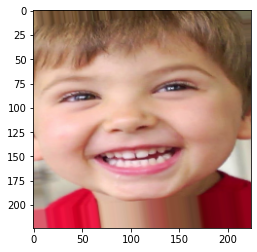

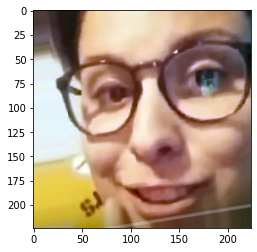

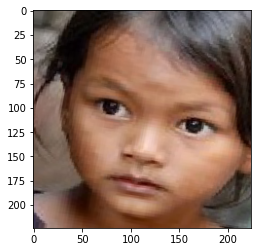

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/drive/My Drive/AutismDataset/train", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)
x_batch, y_batch = next(train_generator)
for i in range (0,5):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

###Validation Generator

Found 175 validated image filenames belonging to 2 classes.
{'0': 0, '1': 1}


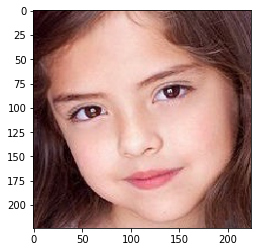

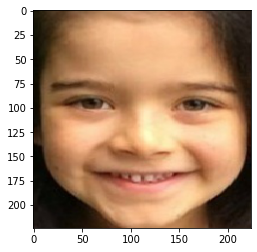

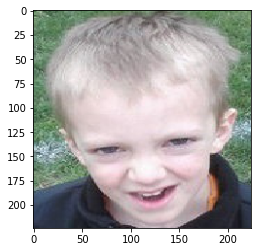

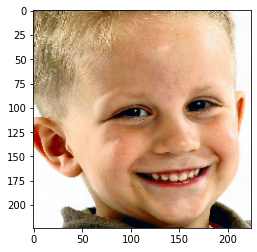

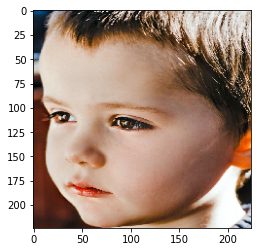

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/My Drive/AutismDataset/train", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)
print(validation_generator.class_indices)
x_batch, y_batch = next(validation_generator)
for i in range (0,5):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

###Fit Model

In [ ]:

history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
130/130 [==============================] - 468s 4s/step - loss: 0.7311 - accuracy: 0.5186 - val_loss: 0.7311 - val_accuracy: 0.4881
Epoch 2/20
130/130 [==============================] - 30s 228ms/step - loss: 0.6986 - accuracy: 0.5276 - val_loss: 0.6639 - val_accuracy: 0.5060
Epoch 3/20
130/130 [==============================] - 30s 230ms/step - loss: 0.6123 - accuracy: 0.6675 - val_loss: 0.5254 - val_accuracy: 0.7321
Epoch 4/20
130/130 [==============================] - 30s 228ms/step - loss: 0.5395 - accuracy: 0.7388 - val_loss: 0.4693 - val_accuracy: 0.7500
Epoch 5/20
130/130 [==============================] - 30s 230ms/step - loss: 0.4849 - accuracy: 0.7696 - val_loss: 0.4351 - val_accuracy: 0.7798
Epoch 6/20
130/130 [==============================] - 30s 230ms/step - loss: 0.4739 - accuracy: 0.7766 - val_loss: 0.4395 - val_accuracy: 0.7619
Epoch 7/20
130/130 [==============================] - 30

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Test: accuracy = 0.803571  ;  loss = 0.463397 


###Prepare Testing

In [ ]:
test_filenames = os.listdir("/content/drive/My Drive/AutismDataset/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

###Create Testing Generator


Found 300 validated image filenames.


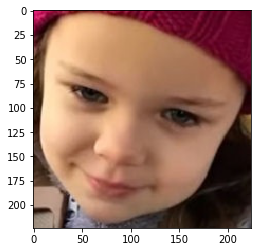

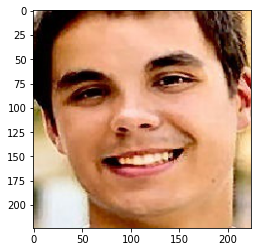

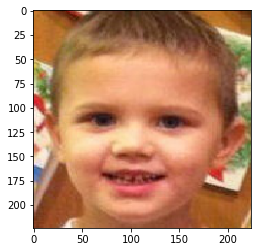

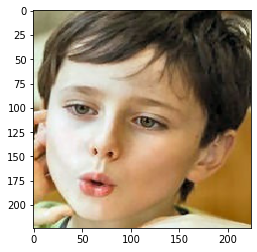

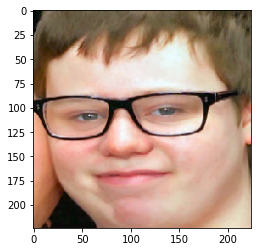

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/My Drive/AutismDataset/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)
x_batch= next(test_generator)
for i in range (0,5):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

# Prediction : 

In [ ]:
threshold = 0.5
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

Instructions for updating:
Please use Model.predict, which supports generators.


Image name as :- actual_name(prediction {0 or 1}) , eg. autistic.127.jpg(1)

###Predicted Result

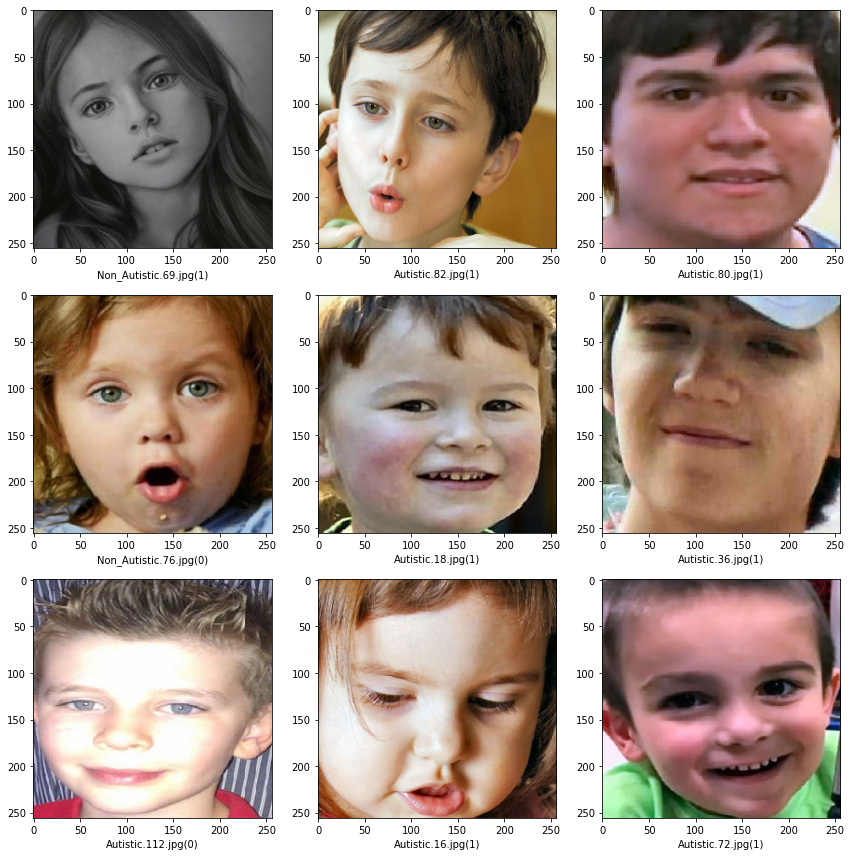

In [ ]:
#See Predicted Result
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/My Drive/AutismDataset/test/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

#Results and Analysis :

In [ ]:
import seaborn as sns

### Predicted: 

In [ ]:

submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission_13010030.csv', index=False)


###CSV file OUTPUT

In [ ]:
import pandas as pd 
pd.read_csv('submission_13010030.csv')

,id,label
0,Autistic,1
1,Autistic,1
2,Autistic,1
3,Autistic,1
4,Autistic,1
...,...,...
295,Non_Autistic,0
296,Non_Autistic,0
297,Non_Autistic,1
298,Non_Autistic,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '(Predicted data)')

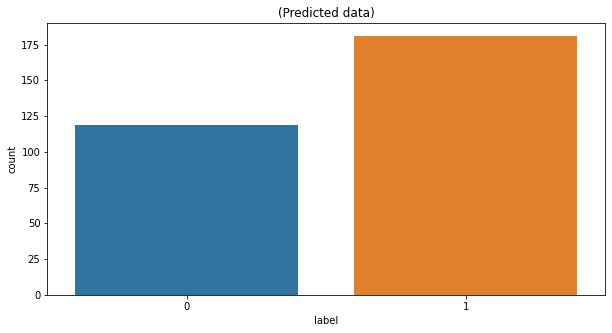

In [ ]:

plt.figure(figsize=(10,5))
sns.countplot(submission_df['label'])
plt.title("(Predicted data)")

### ACTUAL:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '(Test data)')

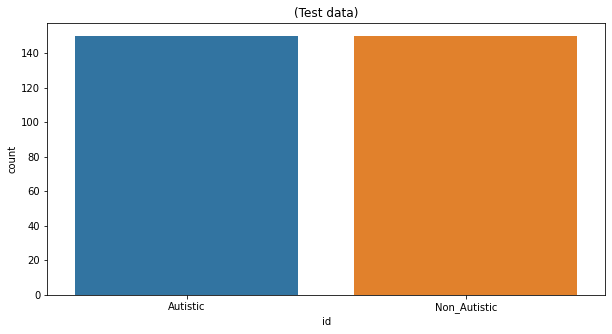

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission_13010030.csv', index=False)


plt.figure(figsize=(10,5))
sns.countplot(submission_df['id'])
plt.title("(Test data)")

### Data results: (predicted) : 

In [ ]:
import csv



my_reader = csv.reader(open('submission_13010030.csv'))
predicted_autistic = 0
for record in my_reader:
    if record[1] == '1':
        predicted_autistic += 1
print("predicted Autistic : " ,predicted_autistic)

my_reader = csv.reader(open('submission_13010030.csv'))
predicted_non_autistic = 0
for record1 in my_reader:
    if record1[1] == '0':
        predicted_non_autistic += 1
print("predicted Non Autistic : " ,predicted_non_autistic)

my_reader = csv.reader(open('submission_13010030.csv'))
autistic = 0
for record1 in my_reader:
    if record1[0] == 'Autistic':
        autistic += 1
print("Actual Autistic : " ,autistic)

my_reader = csv.reader(open('submission_13010030.csv'))
non_autistic = 0
for record1 in my_reader:
    if record1[0] == 'Non_Autistic':
        non_autistic += 1
print("Actual Non Autistic : " ,non_autistic)



predicted Autistic :  181
predicted Non Autistic :  119
Actual Autistic :  150
Actual Non Autistic :  150


In [ ]:

#accuracy for predicting 
print("Actual Non Autistic percentage in total test data: " ,(non_autistic/300)*100,"%")
print("Predicted Non Autistic percentage in total test data: " ,(predicted_non_autistic/300)*100,"%")
print("Actual Autistic percentage in total test data: " ,(autistic/300)*100,"%")

print("Predicted Autistic percentage in total test data: " ,(predicted_autistic/300)*100,"%")


Actual Non Autistic percentage in total test data:  50.0 %
Predicted Non Autistic percentage in total test data:  39.666666666666664 %
Actual Autistic percentage in total test data:  50.0 %
Predicted Autistic percentage in total test data:  60.333333333333336 %


###Confusion Matrix

In [ ]:
my_reader = csv.reader(open('submission_13010030.csv'))
true_pos = 0 #autistic,1
for record1 in my_reader:
    if record1[0] == 'Autistic' and record1[1]=='1':
        true_pos += 1
print("True positive : " ,true_pos)

my_reader = csv.reader(open('submission_13010030.csv'))
true_neg = 0 #non_autistic,0
for record1 in my_reader:
    if record1[0] == 'Non_Autistic' and record1[1]=='0':
        true_neg += 1
print("True Negative : " ,true_neg)

my_reader = csv.reader(open('submission_13010030.csv'))
false_pos = 0 #autistic,0
for record1 in my_reader:
    if record1[0] == 'Autistic' and record1[1]=='0':
       false_pos += 1
print("false Positive : " ,false_pos)

my_reader = csv.reader(open('submission_13010030.csv'))
false_neg = 0 #non_autistic,1
for record1 in my_reader:
    if record1[0] == 'Non_Autistic' and record1[1]=='1':
       false_neg += 1
print("false Negative : " ,false_neg)

True positive :  140
True Negative :  109
false Positive :  10
false Negative :  41


###Accuracy

In [ ]:
accuracy = (true_pos + true_neg)/(true_pos + true_neg + false_pos + false_neg)
print("Accuracy is: ",accuracy*100,"%")

Accuracy is:  83.0 %


###Precision

In [ ]:
precision = true_pos / ( true_pos + false_pos)
print("Precision is: ",precision*100,"%")

Precision is:  93.33333333333333 %


###Sensitivity

In [ ]:
sensitivity = true_pos / (true_pos + false_neg)
print("Sensitivity is: ",sensitivity*100,"%")

Sensitivity is:  77.34806629834254 %


###Specificity

In [ ]:
Specificity =true_neg / (true_neg + false_pos)
print("Specificity is: ",Specificity*100,"%")

Specificity is:  91.59663865546219 %
